# Analyzing StackOverflow 2022 Survey data

This notebook contains an analysis of survey data conducted by Stackoverflow for the year 2022. The survey is an annual developer survey, for the year 2022, the survey was conducted between May 11, 2022 to June 1, 2022.  The survey got response from developers from over 180 countries. 


In [1]:
#importing required libraries
import pandas as pd #for data analysis and manipulation
import numpy as np #library for working with arrays 
import seaborn as sns #plotting charts and other forms of visualization
from matplotlib import pyplot as plt ##plotting charts and other forms of visualization
from collections import Counter #counting

In [5]:
#reading in the data - csv data
survey_df = pd.read_csv('Result_2022.csv', encoding = 'ISO-8859-1')

In [6]:
#checking the data shape
survey_df.shape

(73268, 79)

The 2022 stackoverflow data contains 73268 rows and 79 columns.

In [7]:
#the columns present in the data
survey_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

The data comes with a data schema, to explain the questions asked for each column. The columns are stored in abbreviated labels for the questions asked. However, stack overflow has attached a schema to easily explain what each column represents 

In [8]:
#reading in the schema 
Schema = pd.read_csv('Schema2022.csv', encoding = 'ISO-8859-1')

In [9]:
Schema.columns

Index(['qid', 'qname', 'question', 'force_resp', 'type', 'selector'], dtype='object')

In [10]:
Schema.head(20)

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
6,QID297,CodingActivities,Which of the following best describes the code...,False,MC,MAVR
7,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
8,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR
9,QID276,LearnCode,How did you learn to code? Select all that apply.,False,MC,MAVR


In [11]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

The data contains *73268 rows and 79 columns*, each survey question requires a specific answer type, hence creating multiple data types.


In [12]:
survey_df.describe()

,ResponseId,CompTotal,VCHostingPersonal use,VCHostingProfessional use,WorkExp,ConvertedCompYearly
count,73268.000000000,38422.000000000,0.000000000,0.000000000,36769.000000000,38071.000000000
mean,36634.500000000,23424340221747959297504942608856691548764873498...,NaN,NaN,10.242378090,170761.277849282
std,21150.794098568,45914781878161738872227058510324868731367416738...,NaN,NaN,8.706849849,781413.236402613
min,1.000000000,0.000000000,NaN,NaN,0.000000000,1.000000000
25%,18317.750000000,30000.000000000,NaN,NaN,4.000000000,35832.000000000
50%,36634.500000000,77500.000000000,NaN,NaN,8.000000000,67845.000000000
75%,54951.250000000,154000.000000000,NaN,NaN,15.000000000,120000.000000000
max,73268.000000000,90000000000000006093448009035034248110033526180...,NaN,NaN,50.000000000,50000000.000000000


Most of the data cleaning have been done by Stack overflow, although some columns still have null values. This will be handled with care, so as to ensure that rows are kept in place for insightful analysis.

## Exporatory Data Analysis

In this project, the analysis will be carried out from a question based approach, columns present in the data will be used to provide answers to some questions. 
**Section 1**
Demography of the respondents
Genders
Countries
Ethnicity

**Section 2**
RemoteWork

**section 3**
What are the popular programming languages?
What are the popular databases?
What are the languages developers intend to learn in the future?

*To answer these questions, columns would be subsetted for each question

<AxesSubplot:title={'center':'Top Countries'}, xlabel='Country'>

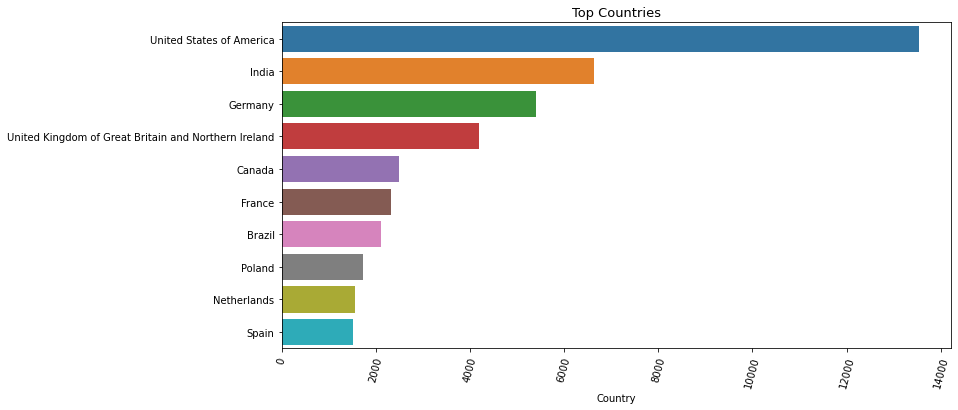

In [13]:
#create a dataframe to answer questions from the first section
#what are the top 10 countries with the most respondents to this survey
q1 = survey_df[['Country','Age', 'Gender','Ethnicity']]
q1.dropna(axis = 0)
Top_countries = q1.Country.value_counts().head(10)
plt.figure(figsize = (12,6))
plt.xticks(rotation = 75)
plt.title('Top Countries', size = 13)
sns.barplot(x= Top_countries, y= Top_countries.index)


The United states tops this list, followed by India. 

In [14]:
#checking the age column to know the age category with the most respondents
q1.Age.value_counts()

25-34 years old       28112
18-24 years old       16646
35-44 years old       13988
45-54 years old        5281
Under 18 years old     3866
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Name: Age, dtype: int64

<AxesSubplot:title={'center':'Age Category'}, xlabel='Age'>

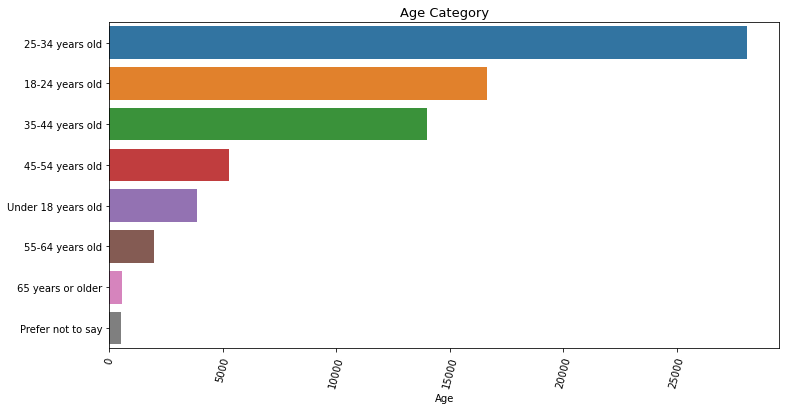

In [15]:
#What age category is mostly represented in this survey
Age_category = q1.Age.value_counts().head(10)
plt.figure(figsize = (12,6))
plt.xticks(rotation = 75)
plt.title('Age Category', size = 13)
sns.barplot(x= Age_category, y= Age_category.index)

Age categories *(25-34 and 18-24)* are the most represented age categories. A large number of youths are the most represented in this survey and rightly so. Elderly men from age 50 and above are sparsely represented in the survey.

<AxesSubplot:title={'center':'Gender Category'}, xlabel='Gender'>

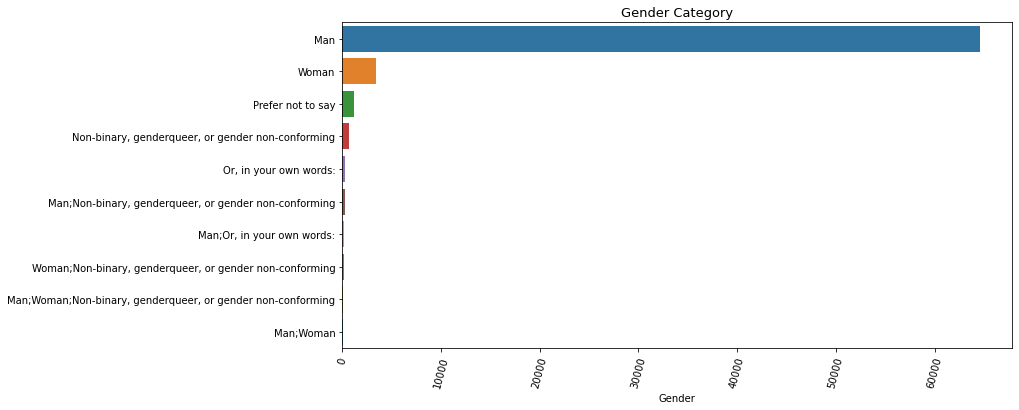

In [16]:
#what gender type/category is mostly represented in this survey
Gender_category = q1.Gender.value_counts().head(10)
plt.figure(figsize = (12,6))
plt.xticks(rotation = 75)
plt.title('Gender Category', size = 13)
sns.barplot(x= Gender_category, y= Gender_category.index)

Men are the most represented Gender group in this survey.

In [17]:

q1.Ethnicity.value_counts()

European                                             14612
White                                                13633
White;European                                        8694
Indian                                                5240
Asian                                                 3346
                                                     ...  
Indian;European;African;Multiracial                      1
Asian;East Asian;Southeast Asian;Pacific Islander        1
Middle Eastern;Asian;Multiracial;Biracial                1
Or, in your own words:;European;Asian                    1
White;European;North African;Hispanic or Latino/a        1
Name: Ethnicity, Length: 1055, dtype: int64

<AxesSubplot:title={'center':'Different Ethnicity'}, xlabel='Ethnicity'>

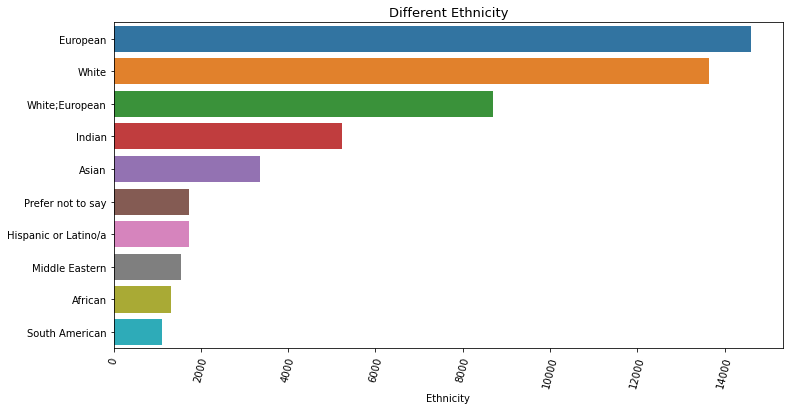

In [18]:
#ethnic groups 
Ethnic_category = q1.Ethnicity.value_counts().head(10)
plt.figure(figsize = (12,6))
plt.xticks(rotation = 75)
plt.title('Different Ethnicity', size = 13)
sns.barplot(x= Ethnic_category, y= Ethnic_category.index)

*Europeans are the most represented ethnic group in this survey, followed closed by people who identify as white. 

**Section 2**
Are developers working remotely, full time in person or combination of both?

In [19]:
survey_df.RemoteWork.value_counts()

Fully remote                            25341
Hybrid (some remote, some in-person)    25021
Full in-person                           8596
Name: RemoteWork, dtype: int64

We want to explore the disposition of some of the respondents to remote work.

<AxesSubplot:title={'center':'Remote work'}, xlabel='RemoteWork'>

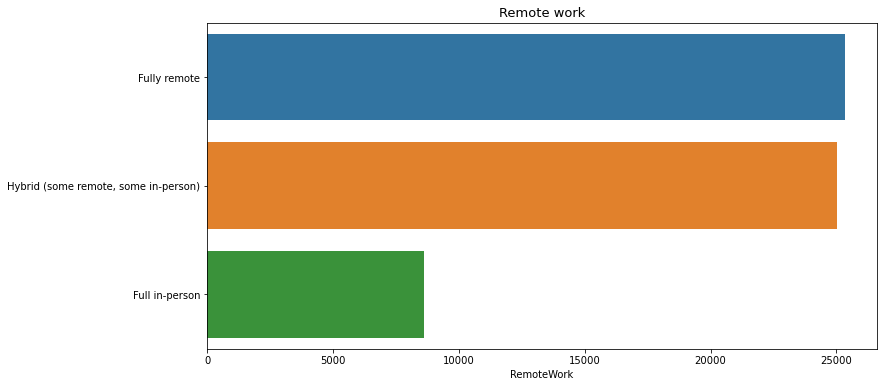

In [20]:
#let's first see the disposition of the general respodents to remote work
q2 = survey_df[['RemoteWork', 'Country']]
q2.dropna(axis = 0)
Remote = q2.RemoteWork.value_counts()
plt.figure(figsize = (12, 6))
plt.title('Remote work', size = 13)
sns.barplot(x= Remote, y= Remote.index)


The barplot shows that majority of developers work remotely or in an hybrid role. Very few developers work 'full in-person'

How many developers work remotely, in-person or hybrid in what country?

In [22]:
#let's add some columns to check how different respondent from different countries, work.
q2['FullyRemote'] = (q2.RemoteWork == 'Fully remote')
q2['Hybrid'] = (q2.RemoteWork == "Hybrid (some remote, some in-person)")
q2['Full_in_person'] = (q2.RemoteWork == "Full in-person")

C:\Users\Jeff\AppData\Local\Temp\ipykernel_2844\747499429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['FullyRemote'] = (q2.RemoteWork == 'Fully remote')
C:\Users\Jeff\AppData\Local\Temp\ipykernel_2844\747499429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['Hybrid'] = (q2.RemoteWork == "Hybrid (some remote, some in-person)")
C:\Users\Jeff\AppData\Local\Temp\ipykernel_2844\747499429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [23]:
q2.Full_in_person.value_counts()

False    64672
True      8596
Name: Full_in_person, dtype: int64

In [24]:
q2['FullyRemote'] = q2['FullyRemote'].astype(int)
q2['Hybrid'] = q2['Hybrid'].astype(int)
q2['Full_in_person'] = q2['Full_in_person'].astype(int)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_2844\1700849318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['FullyRemote'] = q2['FullyRemote'].astype(int)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_2844\1700849318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2['Hybrid'] = q2['Hybrid'].astype(int)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_2844\1700849318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

<AxesSubplot:title={'center':'Hybrid Role'}, xlabel='Hybrid', ylabel='Country'>

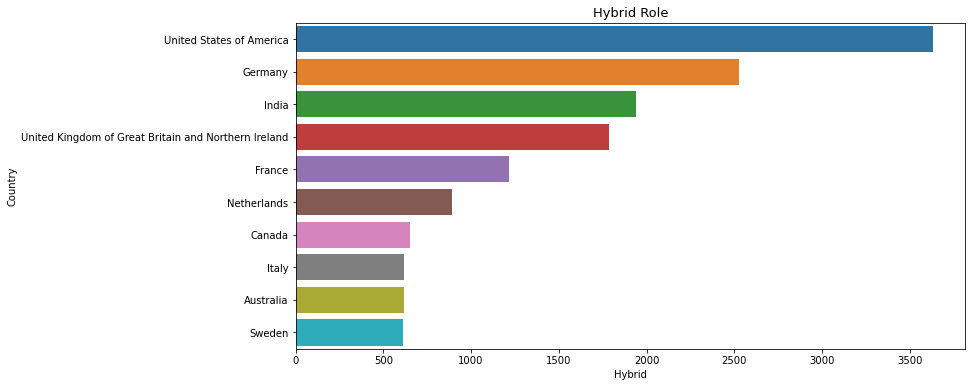

In [25]:
#developers in hybrid roles per top_countries
Hybrid_category = q2.groupby('Country')['Hybrid'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize = (12, 6))
plt.title('Hybrid Role', size = 13)
sns.barplot(x= Hybrid_category, y= Hybrid_category.index)


The chart is showing that lots of developers in the States, Germany and India work in hybrid positions. 

<AxesSubplot:title={'center':'Fully Remote role'}, xlabel='FullyRemote', ylabel='Country'>

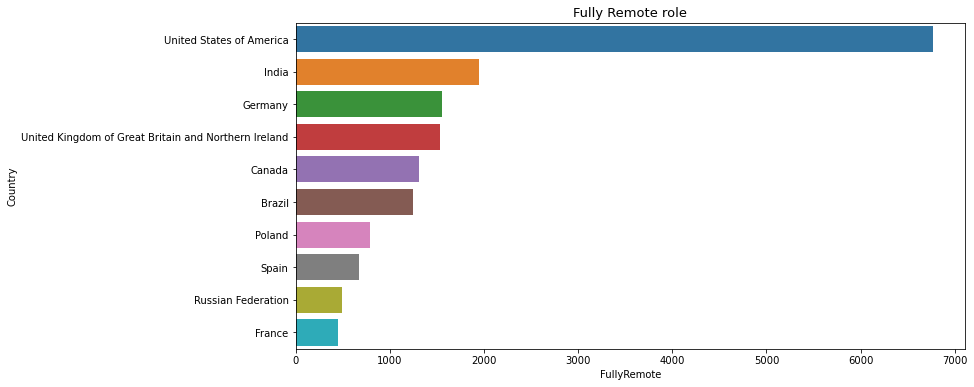

In [26]:
#fully remote roles
Remote_category = q2.groupby('Country')['FullyRemote'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize = (12, 6))
plt.title('Fully Remote role', size = 13)
sns.barplot(x= Remote_category, y= Remote_category.index)


Most developers in *fully remote roles* are in the United States, other countries come at a very distant positions. 

<AxesSubplot:title={'center':'Full in person role'}, xlabel='Full_in_person', ylabel='Country'>

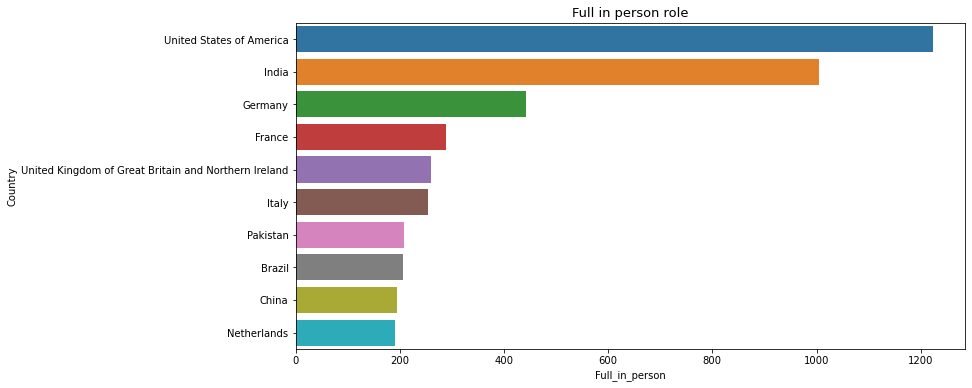

In [27]:
#in person roles
Full_in_person_category = q2.groupby('Country')['Full_in_person'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize = (12, 6))
plt.title('Full in person role', size = 13)
sns.barplot(x= Full_in_person_category, y= Full_in_person_category.index)


# Section 3: 

What are the popular programming languages and databases developers have worked with?
What are the languages and databases developers intend to work with in the future?


In [28]:
q3 = survey_df[['LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith']]



In [29]:
q3.LanguageHaveWorkedWith.value_counts()

HTML/CSS;JavaScript;TypeScript                                                              1250
Python                                                                                       962
HTML/CSS;JavaScript                                                                          914
HTML/CSS;JavaScript;PHP;SQL                                                                  745
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                        570
                                                                                            ... 
C#;Java;JavaScript;PHP;PowerShell;SQL;TypeScript                                               1
C++;HTML/CSS;JavaScript;Python;Solidity;SQL                                                    1
Dart;Haskell;HTML/CSS;Java;R;SQL;TypeScript                                                    1
Bash/Shell;C;C#;Go;HTML/CSS;Java;JavaScript;Lua;Perl;PHP;Python;Ruby;Rust;SQL;TypeScript       1
C#;JavaScript;Lua;PowerShell;S

In [30]:
def split_col(df, column):
    ''' This function split values in a column
    '''
    
    dfcopy = df
    column_series = dfcopy[column].apply(lambda x: x.split(';'))
    
    return column_series

q3['LanguageHaveWorkedWith'] = q3['LanguageHaveWorkedWith'].fillna('missing')
program_lang_list = split_col(q3, 'LanguageHaveWorkedWith')

C:\Users\Jeff\AppData\Local\Temp\ipykernel_2844\4178513561.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['LanguageHaveWorkedWith'] = q3['LanguageHaveWorkedWith'].fillna('missing')


In [31]:
program_lang_list

0                                                [missing]
1                                 [JavaScript, TypeScript]
2                  [C#, C++, HTML/CSS, JavaScript, Python]
3                        [C#, JavaScript, SQL, TypeScript]
4        [C#, HTML/CSS, JavaScript, SQL, Swift, TypeScr...
                               ...                        
73263    [Bash/Shell, Dart, JavaScript, PHP, Python, SQ...
73264      [Bash/Shell, HTML/CSS, JavaScript, Python, SQL]
73265             [HTML/CSS, JavaScript, PHP, Python, SQL]
73266                                    [C#, Delphi, VBA]
73267    [C#, JavaScript, Lua, PowerShell, SQL, TypeScr...
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

In [32]:
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

flattened_proglist = disarray(program_lang_list)

In [33]:
def group_list(data_list):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value} for key, value in grouped_list.items()]
    
    return grouped_dict

    
# Groping a list and creating a dict.
dict_worked_languages = group_list(flattened_proglist)
dict_worked_languages

[{'Programming Language': 'missing', 'Count': 2293},
 {'Programming Language': 'JavaScript', 'Count': 46443},
 {'Programming Language': 'TypeScript', 'Count': 24752},
 {'Programming Language': 'C#', 'Count': 19883},
 {'Programming Language': 'C++', 'Count': 16024},
 {'Programming Language': 'HTML/CSS', 'Count': 39142},
 {'Programming Language': 'Python', 'Count': 34155},
 {'Programming Language': 'SQL', 'Count': 35127},
 {'Programming Language': 'Swift', 'Count': 3489},
 {'Programming Language': 'Lua', 'Count': 2867},
 {'Programming Language': 'PHP', 'Count': 14827},
 {'Programming Language': 'C', 'Count': 13692},
 {'Programming Language': 'Java', 'Count': 23644},
 {'Programming Language': 'Delphi', 'Count': 2311},
 {'Programming Language': 'Bash/Shell', 'Count': 20656},
 {'Programming Language': 'PowerShell', 'Count': 8575},
 {'Programming Language': 'Rust', 'Count': 6625},
 {'Programming Language': 'Elixir', 'Count': 1528},
 {'Programming Language': 'Erlang', 'Count': 641},
 {'Progra

In [34]:
#create dataframe from these lists
def createdf(data_dicts):
    ''' Converts a dictionary to dataframe
    '''
    newdf = pd.DataFrame.from_dict(data_dicts)


    
    return newdf

langworkedwith_df = createdf(dict_worked_languages)

In [35]:
langworkedwith_df

,Programming Language,Count
0,missing,2293
1,JavaScript,46443
2,TypeScript,24752
3,C#,19883
4,C++,16024
5,HTML/CSS,39142
6,Python,34155
7,SQL,35127
8,Swift,3489
9,Lua,2867


<AxesSubplot:title={'center':'Programming Languages respondents have worked with'}, xlabel='Count', ylabel='Programming Language'>

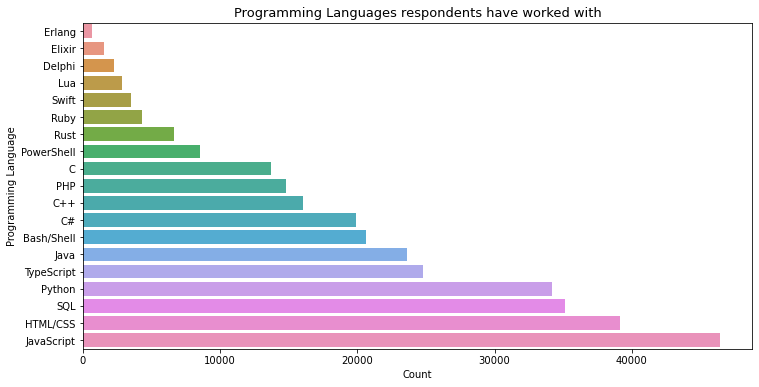

In [36]:
l = langworkedwith_df.head(20).sort_values('Count',ascending = False)
l = l[l['Programming Language'] != 'missing']
result = l.groupby('Programming Language')['Count'].mean().reset_index().sort_values('Count')

plt.figure(figsize=(12,6))
plt.title('Programming Languages respondents have worked with', size = 13)
sns.barplot(y= 'Programming Language', x = 'Count', data = l, order = result['Programming Language'])

Javascript, HTML/CSS, SQL and Python are the top four languages, developers have worked with. 


In [42]:
q3['LanguageWantToWorkWith'] = q3['LanguageWantToWorkWith'].fillna('missing')
lang_to_list = split_col(q3, 'LanguageWantToWorkWith')
flat_list = disarray(lang_to_list)
dictlanguages = group_list(flat_list)
dictlanguages

C:\Users\Jeff\AppData\Local\Temp\ipykernel_2844\2655917494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['LanguageWantToWorkWith'] = q3['LanguageWantToWorkWith'].fillna('missing')


[{'Programming Language': 'missing', 'Count': 6241},
 {'Programming Language': 'Rust', 'Count': 17113},
 {'Programming Language': 'TypeScript', 'Count': 26050},
 {'Programming Language': 'C#', 'Count': 15681},
 {'Programming Language': 'C++', 'Count': 11896},
 {'Programming Language': 'HTML/CSS', 'Count': 25423},
 {'Programming Language': 'JavaScript', 'Count': 31551},
 {'Programming Language': 'SQL', 'Count': 24804},
 {'Programming Language': 'Elixir', 'Count': 3289},
 {'Programming Language': 'F#', 'Count': 1947},
 {'Programming Language': 'Go', 'Count': 15500},
 {'Programming Language': 'Lua', 'Count': 2390},
 {'Programming Language': 'C', 'Count': 7856},
 {'Programming Language': 'Java', 'Count': 13345},
 {'Programming Language': 'Kotlin', 'Count': 9316},
 {'Programming Language': 'Python', 'Count': 29350},
 {'Programming Language': 'Swift', 'Count': 5071},
 {'Programming Language': 'APL', 'Count': 608},
 {'Programming Language': 'Bash/Shell', 'Count': 13242},
 {'Programming Langua

In [43]:
lang_future_df = createdf(dictlanguages)

In [44]:
lang_future_df

,Programming Language,Count
0,missing,6241
1,Rust,17113
2,TypeScript,26050
3,C#,15681
4,C++,11896
5,HTML/CSS,25423
6,JavaScript,31551
7,SQL,24804
8,Elixir,3289
9,F#,1947


<AxesSubplot:title={'center':'Programming Languages respondents wants to work with'}, xlabel='Count', ylabel='Programming Language'>

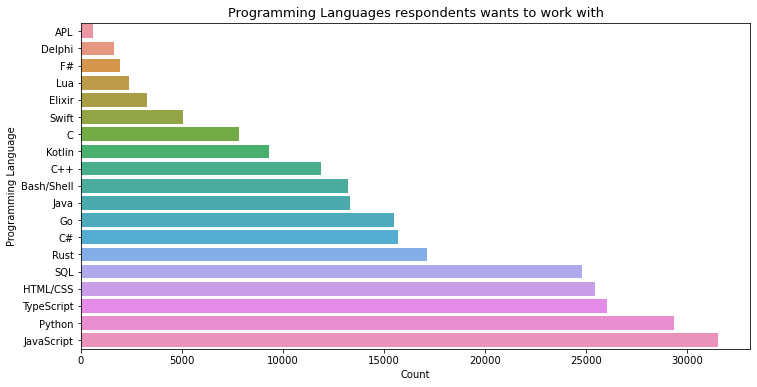

In [45]:
#languages developers will like to work with
future_df = lang_future_df.head(20).sort_values('Count',ascending = False)
future_df = future_df[future_df['Programming Language'] != 'missing']
future_result = future_df.groupby('Programming Language')['Count'].mean().reset_index().sort_values('Count')

plt.figure(figsize=(12,6))
plt.title('Programming Languages respondents wants to work with', size = 13)
sns.barplot(y= 'Programming Language', x = 'Count', data = future_df, order = future_result['Programming Language'])



Javascript still retains it position, as a popular language. Most developers wants to work with in the future. Also, it is noteworthy that developers wants to work wit python, as it closely follows Javascript. 
Typescript is also a language developers should pay attention to.

In [46]:
#database management systems developers have worked with
q3['DatabaseHaveWorkedWith'] = q3['DatabaseHaveWorkedWith'].fillna('missing')


C:\Users\Jeff\AppData\Local\Temp\ipykernel_2844\2614117395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['DatabaseHaveWorkedWith'] = q3['DatabaseHaveWorkedWith'].fillna('missing')


In [47]:
def group_database(data_list):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Database':key, 'Count': value} for key, value in grouped_list.items()]
    
    return grouped_dict


In [48]:
database_to_list = split_col(q3, 'DatabaseHaveWorkedWith')
database_flat_list = disarray(database_to_list)
dict_database = group_database(database_flat_list)
dict_database

[{'Database': 'missing', 'Count': 13147},
 {'Database': 'Microsoft SQL Server', 'Count': 16355},
 {'Database': 'Cloud Firestore', 'Count': 4535},
 {'Database': 'Elasticsearch', 'Count': 7430},
 {'Database': 'Firebase Realtime Database', 'Count': 5309},
 {'Database': 'MongoDB', 'Count': 17228},
 {'Database': 'MySQL', 'Count': 28520},
 {'Database': 'Couchbase', 'Count': 807},
 {'Database': 'CouchDB', 'Count': 783},
 {'Database': 'PostgreSQL', 'Count': 26538},
 {'Database': 'Redis', 'Count': 13471},
 {'Database': 'DynamoDB', 'Count': 5029},
 {'Database': 'Neo4j', 'Count': 1291},
 {'Database': 'SQLite', 'Count': 19487},
 {'Database': 'Cassandra', 'Count': 1617},
 {'Database': 'MariaDB', 'Count': 10912},
 {'Database': 'Oracle', 'Count': 6994},
 {'Database': 'IBM DB2', 'Count': 1219}]

In [49]:
database_df = createdf(dict_database)
database_df

,Database,Count
0,missing,13147
1,Microsoft SQL Server,16355
2,Cloud Firestore,4535
3,Elasticsearch,7430
4,Firebase Realtime Database,5309
5,MongoDB,17228
6,MySQL,28520
7,Couchbase,807
8,CouchDB,783
9,PostgreSQL,26538


<AxesSubplot:title={'center':'Top 20 Database respondents work with'}, xlabel='Count', ylabel='Database'>

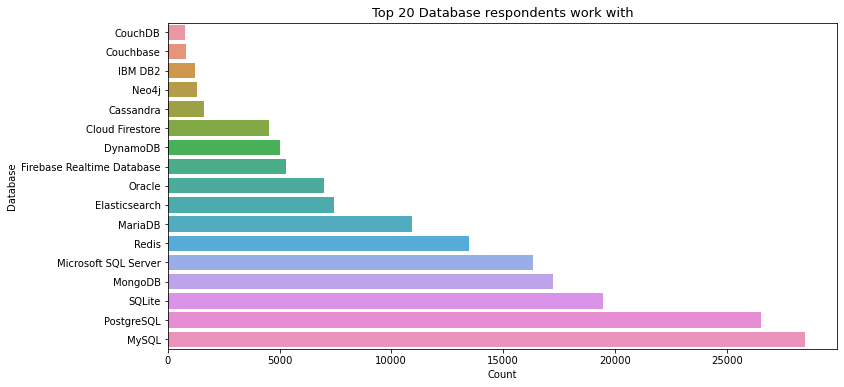

In [50]:
db_df = database_df.head(20).sort_values('Count',ascending = False)
db_df = db_df[db_df['Database'] != 'missing']
db_result = db_df.groupby('Database')['Count'].mean().reset_index().sort_values('Count')

plt.figure(figsize=(12,6))
plt.title('Top 20 Database respondents work with', size = 13)
sns.barplot(y= 'Database', x = 'Count', data = db_df, order = db_result['Database'])



MySQL, PostgreSQL and SQLite are the most popular database management systems developers have worked with

In [51]:
q3['DatabaseWantToWorkWith'] = q3['DatabaseWantToWorkWith'].fillna('missing')


C:\Users\Jeff\AppData\Local\Temp\ipykernel_2844\1229199405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3['DatabaseWantToWorkWith'] = q3['DatabaseWantToWorkWith'].fillna('missing')


In [52]:
futuredb_to_list = split_col(q3, 'DatabaseWantToWorkWith')
futuredb_flat_list = disarray(futuredb_to_list)
future_dict_db = group_database(futuredb_flat_list)
future_dict_db

[{'Database': 'missing', 'Count': 22254},
 {'Database': 'Microsoft SQL Server', 'Count': 9867},
 {'Database': 'Cloud Firestore', 'Count': 3873},
 {'Database': 'Elasticsearch', 'Count': 8533},
 {'Database': 'Firebase Realtime Database', 'Count': 5312},
 {'Database': 'Redis', 'Count': 16211},
 {'Database': 'MySQL', 'Count': 16271},
 {'Database': 'Oracle', 'Count': 3511},
 {'Database': 'PostgreSQL', 'Count': 25212},
 {'Database': 'Neo4j', 'Count': 2354},
 {'Database': 'MongoDB', 'Count': 17297},
 {'Database': 'SQLite', 'Count': 14085},
 {'Database': 'MariaDB', 'Count': 7181},
 {'Database': 'Cassandra', 'Count': 3178},
 {'Database': 'CouchDB', 'Count': 1154},
 {'Database': 'DynamoDB', 'Count': 5309},
 {'Database': 'IBM DB2', 'Count': 519},
 {'Database': 'Couchbase', 'Count': 955}]

In [53]:
future_db_df = createdf(future_dict_db)
future_db_df

,Database,Count
0,missing,22254
1,Microsoft SQL Server,9867
2,Cloud Firestore,3873
3,Elasticsearch,8533
4,Firebase Realtime Database,5312
5,Redis,16211
6,MySQL,16271
7,Oracle,3511
8,PostgreSQL,25212
9,Neo4j,2354


<AxesSubplot:title={'center':'Top 20 Database respondents want to work with'}, xlabel='Count', ylabel='Database'>

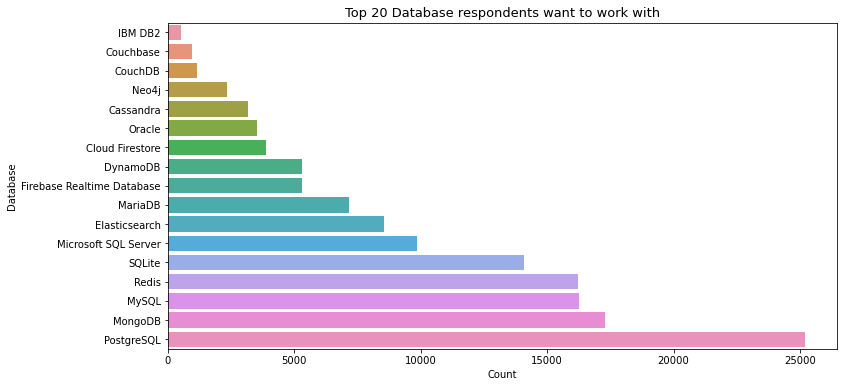

In [54]:
df_db = future_db_df.head(20).sort_values('Count',ascending = False)
df_db = df_db[df_db['Database'] != 'missing']
df_db_result = df_db.groupby('Database')['Count'].mean().reset_index().sort_values('Count')

plt.figure(figsize=(12,6))
plt.title('Top 20 Database respondents want to work with', size = 13)
sns.barplot(y= 'Database', x = 'Count', data = df_db, order = df_db_result['Database'])



PostgreSQL and MongoDB leads MySQL in the list of databases developers would love to work with in future. From this result, it seems MongoDB is catching lots of developers interest. 

## Conclusion
The StackOverflow is a very rich dataset with various columns that gives insights into developer's characteristics, attitutdes, interests and demography. So many insightful studies can be inferred from the dataset. This analysis has been able to give other developers insights into tech stacks (languages and database management systems) developers have worked with and what they intend to work with in future.